## Installing Packages

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LSTM
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

## Spliting Data as Train and Test

In [3]:
df_test = pd.read_csv('Google_Stock_Price_Test.csv')
df_train = pd.read_csv('Google_Stock_Price_Train.csv')
df = pd.concat([df_train,df_test])

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


## Data Preprocessing

In [6]:
df.info() # to check for data summary 

<class 'pandas.core.frame.DataFrame'>
Index: 1278 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1278 non-null   object 
 1   Open    1278 non-null   float64
 2   High    1278 non-null   float64
 3   Low     1278 non-null   float64
 4   Close   1278 non-null   object 
 5   Volume  1278 non-null   object 
dtypes: float64(3), object(3)
memory usage: 69.9+ KB


In [7]:
df.describe()

,Open,High,Low
count,1278.000000,1278.000000,1278.000000
mean,537.994906,542.168897,533.278803
std,154.508365,155.582501,153.174011
min,279.120000,281.210000,277.220000
25%,406.037500,408.230000,403.335000
50%,538.395000,542.330000,534.355000
75%,668.862500,677.705000,662.190000
max,837.810000,841.950000,827.010000


In [8]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [7]:
df.shape

(1278, 6)

In [9]:
df.isnull().sum() #to check for null values

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [10]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object

In [12]:
sns.heatmap(df_train.corr(), annot=True, cmap='summer') # to check for high corelation

ValueError: could not convert string to float: '1/3/2012'

In [13]:
df    = df.loc[:,["Open"]].values
train = df[:len(df)-50] 
test = df[len(train):] 
# reshape
train = train.reshape(train.shape[0],1)


In [14]:
train.shape

(1228, 1)

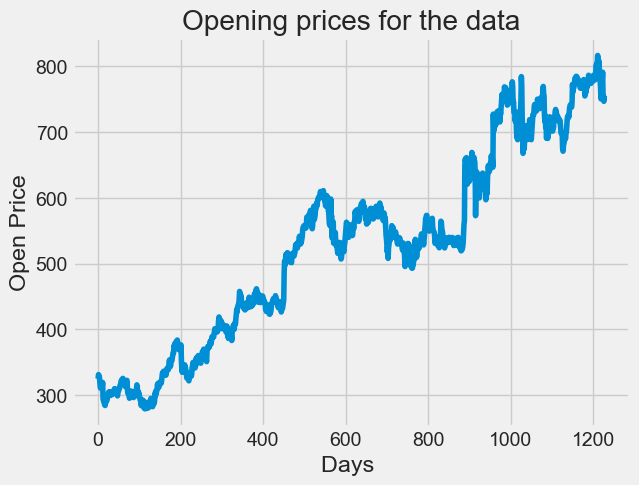

In [15]:
plt.plot(train);
plt.title("Opening prices for the data");
plt.xlabel("Days ")
plt.ylabel("Open Price")
plt.show()

## Normalization / Feature Scaling

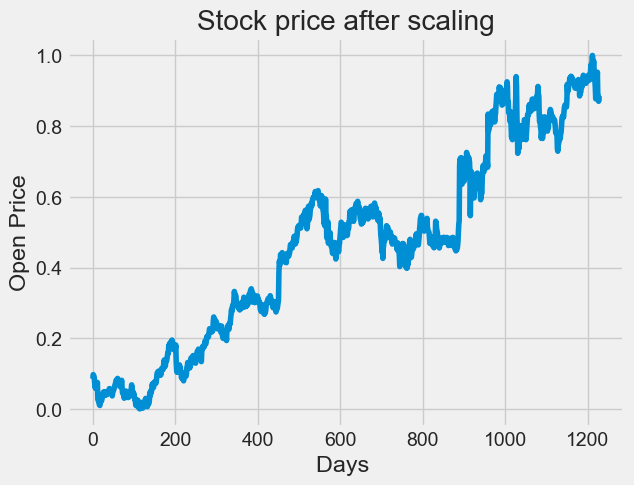

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1)) # defining of Scaler
train_scaled = scaler.fit_transform(train) # applying to Scaler to train
plt.plot(train_scaled)
plt.xlabel("Days ")
plt.ylabel("Open Price")
plt.title("Stock price after scaling")
plt.show()

## Creating X_train and y_train from scaled Train data

In [17]:
# We add first 50 timesteps to "X_train" and  51 timesteps to "y_train" .
X_train = []
y_train = []
timesteps = 50

for i in range(timesteps, train_scaled.shape[0]):
    X_train.append(train_scaled[i-timesteps:i,0])
    y_train.append(train_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)


# Reshaping
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # Dimension of array is 3.

## Creating RNN model 

In [18]:
# --- RNN ---

# Importing the Keras libraries and packages

from keras.models import Sequential  
from keras.layers import Dense 
from keras.layers import SimpleRNN
from keras.layers import Dropout # it block to overfitting 

# Initialising the RNN
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2)) 

# Adding a second RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation. 
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
Rnn_history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

c:\Users\prakh\Desktop\Deep Learning\Assignment 3\Stock-Price-Prediction-using-RNN\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.5638
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2967
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2476
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1820
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1364
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1332
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0932
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0750
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0682
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0608
Epoch 11/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0516
Epoch 12/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0424
Epoch 13/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0395
Epoch 14/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0355
Epoch 15/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - lo

## Evaluating Model

In [19]:
# Losses
Rnn_history.history["loss"]

[0.45535844564437866,
 0.292544960975647,
 0.23514194786548615,
 0.17823652923107147,
 0.12753060460090637,
 0.11256887018680573,
 0.08832627534866333,
 0.07450488209724426,
 0.06490296870470047,
 0.05567967891693115,
 0.04591821879148483,
 0.04241001978516579,
 0.03793986886739731,
 0.03354483097791672,
 0.03137848898768425,
 0.02861873060464859,
 0.025757545605301857,
 0.024499839171767235,
 0.02264726161956787,
 0.018311014398932457,
 0.019694289192557335,
 0.016878847032785416,
 0.015476812608540058,
 0.015395918861031532,
 0.013228495605289936,
 0.013433851301670074,
 0.012811791151762009,
 0.011870681308209896,
 0.0103656817227602,
 0.010127633810043335,
 0.009466608986258507,
 0.009158330038189888,
 0.008847013115882874,
 0.008354485966265202,
 0.008326094597578049,
 0.0076560270972549915,
 0.007679426111280918,
 0.007554451934993267,
 0.006620646920055151,
 0.006273301783949137,
 0.006545528303831816,
 0.005718189291656017,
 0.006106182467192411,
 0.005971353035420179,
 0.00570

In [20]:
min_loss = np.min(Rnn_history.history["loss"])
RMSE = math.sqrt(min_loss)
RMSE

0.045485986952292716

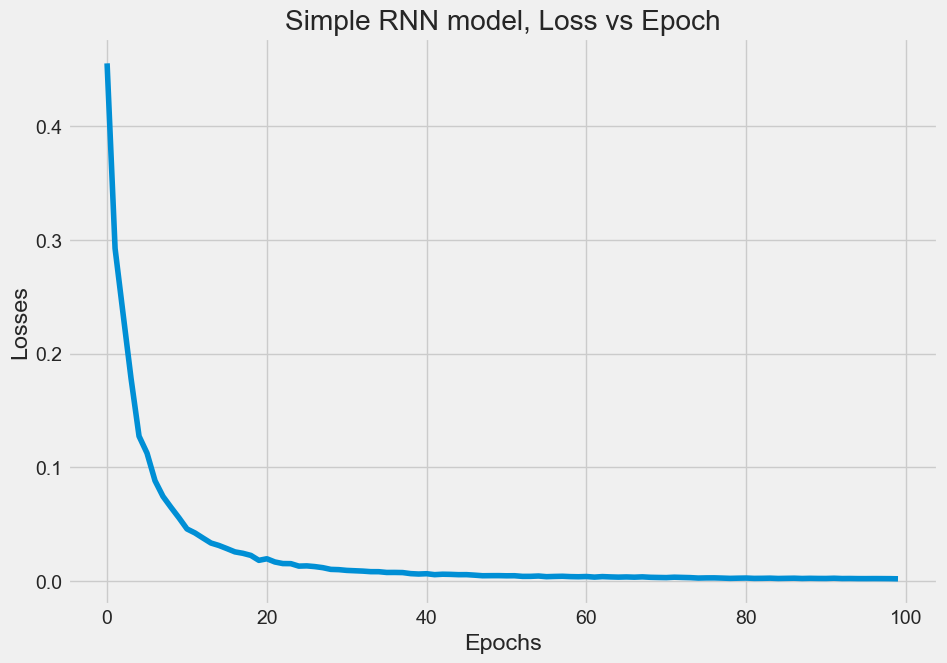

In [21]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(Rnn_history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

In [22]:
inputs = df[len(df) - len(test) - timesteps:]
inputs = scaler.transform(inputs)  # min max scaler

In [23]:
X_test = []
for i in range(timesteps, inputs.shape[0]):
    X_test.append(inputs[i-timesteps:i, 0]) # We get 50 elements by shifting from 0 to 50 and from 1 to 51. 
X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## Model predictions for train data 

In [24]:
predicted_data = regressor.predict(X_test)
predicted_data = scaler.inverse_transform(predicted_data)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 293ms/step


In [25]:
rmse = np.sqrt(np.mean(((predicted_data - test) ** 2)))
rmse

np.float64(13.953589245392171)

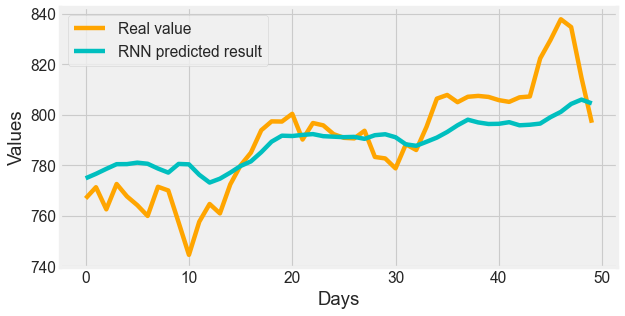

In [26]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="orange",label="Real value")
plt.plot(predicted_data,color="c",label="RNN predicted result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

## Creating LSTM Model

In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [28]:
model = Sequential()
model.add(LSTM(10, input_shape=(None,1)))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer='Adam')
history=model.fit(X_train,y_train,epochs=50, batch_size=1)

Epoch 1/50


c:\Users\prakh\Desktop\Deep Learning\Assignment 3\Stock-Price-Prediction-using-RNN\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1178/1178 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0062
Epoch 2/50
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 9.2617e-04
Epoch 3/50
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 7.3511e-04
Epoch 4/50
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 6.3008e-04
Epoch 5/50
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 6.5030e-04
Epoch 6/50
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 5.1008e-04
Epoch 7/50
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 4.5397e-04
Epoch 8/50
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 3.7208e-04
Epoch 9/50
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 3.6094e-04
Epoch 10/50
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 3.5656e-04
Epoch 11/50
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2.8515e-04
Epoch 12/50
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 3.9328e-04
Epoch 13/50
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 3.3210e-04
Epoch 14/50
1178/1178 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss:

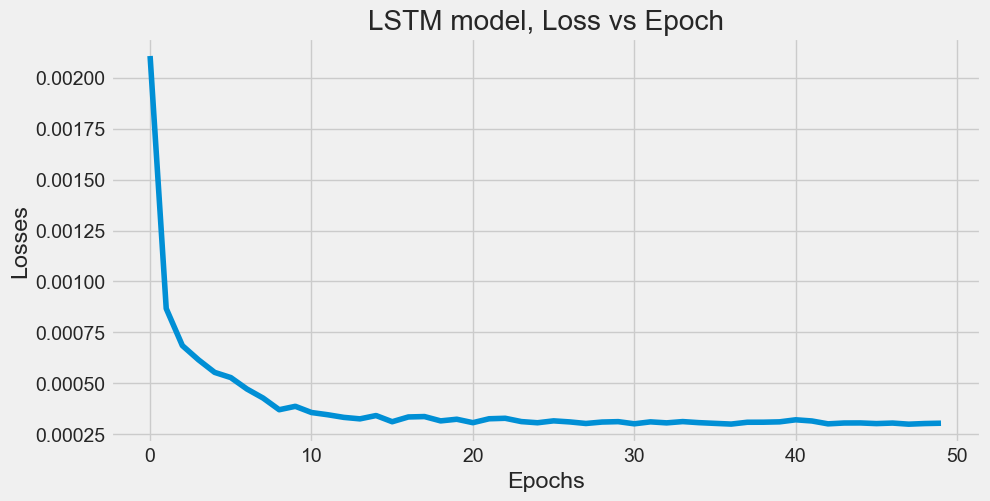

In [29]:
plt.figure(figsize =(10,5))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Loss vs Epoch")
plt.show()

## Model predictions

In [30]:
predicted_data2=model.predict(X_test)
predicted_data2=scaler.inverse_transform(predicted_data2)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


In [31]:
min_loss = np.min(history.history['loss'])
RMSE = math.sqrt(min_loss)
RMSE

0.0173131942318262

In [32]:
rmse = np.sqrt(np.mean(((predicted_data2 - test) ** 2)))
rmse

np.float64(9.677334007270836)

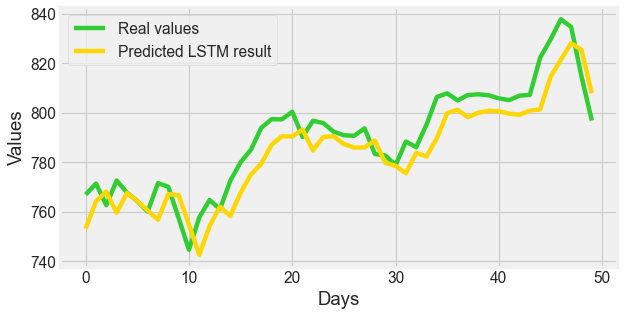

In [33]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="LimeGreen",label="Real values")
plt.plot(predicted_data2,color="Gold",label="Predicted LSTM result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

## Comparetive Study of RNN predictions and LSTM predictions

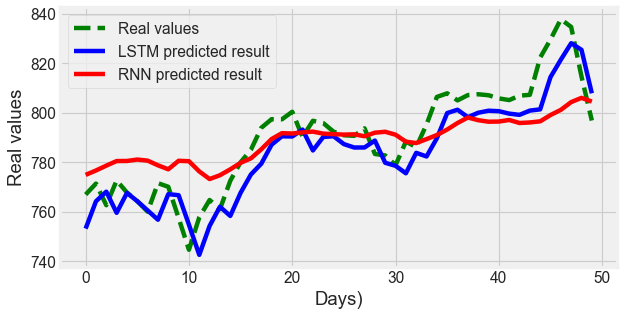

In [34]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="green", linestyle='dashed',label="Real values")
plt.plot(predicted_data2,color="blue", label="LSTM predicted result")
plt.plot(predicted_data,color="red",label="RNN predicted result") #
plt.legend()
plt.xlabel("Days)")
plt.ylabel("Real values")
plt.grid(True)
plt.show()